<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%ED%9A%8C%EA%B7%80vs%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN 분류에 사용할 데이터 - 붓꽃 데이터

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
data = iris_data['data']
data.shape #150개 X (setal-length, setal-width, pepal-length, pepal-width)

(150, 4)

In [4]:
target = iris_data['target']
target.shape #150개 ([:50]>=0, [50:100]>=1, [100:]=>2)

(150,)

In [6]:
tname = iris_data['target_names']
tname #0:setosa, 1:versicolor, 2:virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
for i , t in enumerate(target):
  print(f"{i} : {tname[t]}")

0 : setosa
1 : setosa
2 : setosa
3 : setosa
4 : setosa
5 : setosa
6 : setosa
7 : setosa
8 : setosa
9 : setosa
10 : setosa
11 : setosa
12 : setosa
13 : setosa
14 : setosa
15 : setosa
16 : setosa
17 : setosa
18 : setosa
19 : setosa
20 : setosa
21 : setosa
22 : setosa
23 : setosa
24 : setosa
25 : setosa
26 : setosa
27 : setosa
28 : setosa
29 : setosa
30 : setosa
31 : setosa
32 : setosa
33 : setosa
34 : setosa
35 : setosa
36 : setosa
37 : setosa
38 : setosa
39 : setosa
40 : setosa
41 : setosa
42 : setosa
43 : setosa
44 : setosa
45 : setosa
46 : setosa
47 : setosa
48 : setosa
49 : setosa
50 : versicolor
51 : versicolor
52 : versicolor
53 : versicolor
54 : versicolor
55 : versicolor
56 : versicolor
57 : versicolor
58 : versicolor
59 : versicolor
60 : versicolor
61 : versicolor
62 : versicolor
63 : versicolor
64 : versicolor
65 : versicolor
66 : versicolor
67 : versicolor
68 : versicolor
69 : versicolor
70 : versicolor
71 : versicolor
72 : versicolor
73 : versicolor
74 : versicolor
75 : versi

In [9]:
def distance(x1, x2):
  return sum((x1-x2)**2)**(1/2)

In [10]:
import numpy as np
na1 = np.array([1,2])
na2 = np.array([5,5])
print(distance(na1,na2))

5.0


In [39]:
def find_k_nearest_neighbor_c(xs,ys,tx,k=5):
  sarr = []
  for i,x in enumerate(xs):
    dis = distance(x,tx)
    sarr.append((dis,i)) #거리순으로 정렬한 이후에도 몇 번째 요소인지 기억하기 위해(dis,i)를 보관
  sarr.sort(key = lambda x:x[0])
  nd = {} #어떠한 클래스에 속하는지 분포를 파악해서 보관하기 위한 용도
  for x in sarr[:k]: #k개의 가까운 이웃을 반복
    neighbor = ys[x[1]] #x[0]은 거리 x[1]은 인덱스이므로 원하는 값은 ys[x[1]]
    if neighbor in nd:
      nd[neighbor] += 1
    else:
      nd[neighbor] = 0 
  return max(nd,key=nd.get) #가장 많이 나온 클래스를 반환

In [40]:
def find_k_nearest_neighbors_c(xs, ys, t_xs, k=5):
  return np.array([find_k_nearest_neighbor_c(xs,ys,tx,k) for tx in t_xs])

In [41]:
data.shape, target.shape

((150, 4), (150,))

In [42]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys, = train_test_split(data,target)
train_xs.shape, test_xs.shape, train_ys.shape, test_ys.shape

((112, 4), (38, 4), (112,), (38,))

In [43]:
pred_val = find_k_nearest_neighbors_c(train_xs, train_ys, test_xs) #학습 후 예측하시오.

In [44]:
print(f"예측 결과 : {pred_val}")
print(f"실제 결과 : {test_ys}")

예측 결과 : [1 1 2 0 2 2 2 0 1 0 1 0 1 0 2 2 1 2 2 1 0 1 1 1 0 1 0 0 1 1 2 1 1 0 0 2 2
 0]
실제 결과 : [1 1 2 0 2 2 2 0 1 0 1 0 1 0 2 2 2 2 2 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 2 2
 0]


In [45]:
import matplotlib.pyplot as plt

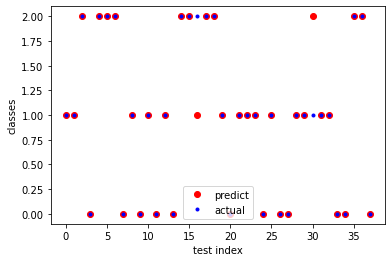

In [47]:
plt.plot(pred_val, 'ro', label='predict')
plt.plot(test_ys, 'b.', label='actual')
plt.xlabel("test index")
plt.ylabel('classes')
plt.legend()
plt.show()

In [50]:
def evaluate(actual_ys, predict_ys):
  correct_cnt = 0
  for i, y in enumerate(actual_ys):
    if predict_ys[i] == y:
      correct_cnt+=1
    return correct_cnt/len(actual_ys)

In [51]:
print(evaluate(test_ys, pred_val))

0.02631578947368421


ML 개체 사용(사이킷 런의 KNN 분류 모델)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier() #모델 개체 생성
knc_model.fit(train_xs, train_ys) #학습
pred_val2 = knc_model.predict(test_xs) #예측하시오

In [55]:
print(f"예측 결과1 : {pred_val}")
print(f"예측 결과2 : {pred_val2}")
print(f"실제 결과 : {test_ys}")

예측 결과1 : [1 1 2 0 2 2 2 0 1 0 1 0 1 0 2 2 1 2 2 1 0 1 1 1 0 1 0 0 1 1 2 1 1 0 0 2 2
 0]
예측 결과2 : [1 1 2 0 2 2 2 0 1 0 1 0 1 0 2 2 1 2 2 1 0 1 1 1 0 1 0 0 1 1 2 1 1 0 0 2 2
 0]
실제 결과 : [1 1 2 0 2 2 2 0 1 0 1 0 1 0 2 2 2 2 2 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 2 2
 0]


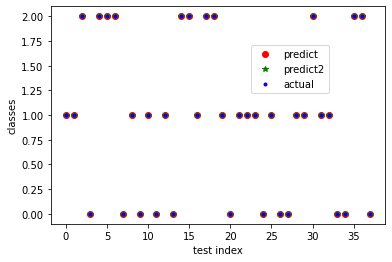

In [59]:
plt.plot(pred_val, 'ro', label='predict')
plt.plot(pred_val, 'g*', label='predict2')
plt.plot(pred_val, 'b.', label='actual')
plt.xlabel("test index")
plt.ylabel("classes")
plt.legend(loc = (0.6,0.6))
plt.show()

In [60]:
print(evaluate(test_ys,pred_val2))

0.02631578947368421
